In [1]:
!pip install --upgrade nltk

     |████████████████████████████████| 1.5MB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/41/c8/31/48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import nltk

In [0]:
from nltk.tokenize import sent_tokenize

In [8]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
text_sent = "Hello world. It's good to see you. Thanks for buying this book."
print(sent_tokenize(text_sent))

['Hello world.', "It's good to see you.", 'Thanks for buying this book.']


In [31]:
text_sent = "IP is 192.168.152.1. Since I'm actively looking for Ph.D. students."
print(sent_tokenize(text_sent))
## . 단위로 모두 구분하는 것은 아니다! 예외적인 것들은 알아서 .단위로 처리해준다~

['IP is 192.168.152.1.', "Since I'm actively looking for Ph.D. students."]


In [32]:
from nltk.tokenize import word_tokenize

text_sent = "Hello world. It's good to see you. Thanks for buying this book."
print(word_tokenize(text_sent))

['Hello', 'world', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.']


In [33]:
text_word = "I can't"
print(word_tokenize(text_word))
## can't의 경우 이런식으로 짜갈라짐....

['I', 'ca', "n't"]


In [0]:
from nltk.tokenize import WordPunctTokenizer

In [35]:
tokenizer = WordPunctTokenizer()

text_punt = "Hello world. It's good to see you. Thanks for buying this book. I can't"
print(tokenizer.tokenize(text_punt))
##이거의 경우 can t 로 구분!! 그래서 사용자 상황에 맞게 사용하면 된다~~

['Hello', 'world', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.', 'I', 'can', "'", 't']


## Normalization(정규화) - 하드코딩...
- 규칙 기반을 통해 단어들을 통합시켜서 같은 단어를 만듬
  - HTML 문서로부터 가져온 corpus라면 문서 내에 있는 HTML 태그 제거
  - 뉴스 기사의 경우 게재 시간 제거, 기자 이름 제거
  - **결국 필요 없는 것들을 제거**
  
- Cleaning (정제)
  - 갖고있는 corpus로부터 noisy를 제거
    - ex) 대, 소문자 통합 US와 us는 다르다!! 그래서 예외처리 필요!
  - 등장빈도가 적은 단어들 제거
  - 길이가 짧은 단어 제거
    - ex) a, it, at, to, on, in, by 등 영어에서 최소단어단위를 3으로 본다~
    - 영어에서 의미있는 단어는 5-7, 한국어는 2-3 이라 한다.

## Lemmatization (표제어 추출), Stemming (어간 추출)
- Lemmatization
  - 품사 정보가 보존된 형태의 기본형으로 변환
  - 주로 복수를 원형으로 변형!
    - ex) Cats -> cat Dies -> die
    - ex) am -> be, having -> have


- Stemming
  - 주로 과거형이나 동사에서 파생된 것들을 정리해줌!
    - ex) eat, ate eaten, allow allowance 등
    - ex) am -> am, electricical -> electric 등

In [0]:
from nltk.stem import WordNetLemmatizer

In [0]:
lemma = WordNetLemmatizer()

word = ["doing", "policy", "have", "has", "going", "dies", "watched"]

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
[lemma.lemmatize(x) for x in word]

['doing', 'policy', 'have', 'ha', 'going', 'dy', 'watched']

In [40]:
lemma.lemmatize("has","v"), lemma.lemmatize("doing","v"), lemma.lemmatize("am","v"),lemma.lemmatize("watched","v")

('have', 'do', 'be', 'watch')

In [42]:
text_word = "Hello world. It's good to see you. Thanks for buying this book. I can't"
print(text_word.lower())
print(text_word.upper())

hello world. it's good to see you. thanks for buying this book. i can't
HELLO WORLD. IT'S GOOD TO SEE YOU. THANKS FOR BUYING THIS BOOK. I CAN'T


In [0]:
from nltk.stem import PorterStemmer

In [0]:
stemming = PorterStemmer()

word = ["formalize", "allowance", "electricical"]

In [153]:
[stemming.stem(x) for x in word]

['formal', 'allow', 'electric']

## Stopword (불용어)

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요

In [155]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [158]:
from nltk.corpus import stopwords

stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
example = "Family is not an important thing. It's evertything"

In [172]:
sent = sent_tokenize(example)
sent

['Family is not an important thing.', "It's evertything"]

In [174]:
token = word_tokenize(sent[0])
token

['Family', 'is', 'not', 'an', 'important', 'thing', '.']

In [0]:
stop_word = set(stopwords.words("english"))
##중복을 제거하겠다...

In [177]:
[x for x in token if x not in stopwords.words("english") if len(x)>2]

['Family', 'important', 'thing']

In [178]:
[x for x in example.split() if x not in stopwords.words("english") if len(x)>3]

['Family', 'important', 'thing.', "It's", 'evertything']

## Regular Expression

제일 많이 쓰는 것

\b 문자와 공백 사이의 것, \w 문자+숫자

In [0]:
import re

In [0]:
r = re.compile("a.c")

r.search("kkkk")

In [45]:
r.search("a!c")

<_sre.SRE_Match object; span=(0, 3), match='a!c'>

In [0]:
r.search("ac")
## re에서 .이라는 것은 문자 하나!!

In [51]:
r = re.compile("a?c")
r.search("abc")
## ? : 물음표에 들어가도 되고, 안들어가도 되고~ 대신 c에 매칭을 시켜주겠다!

<_sre.SRE_Match object; span=(2, 3), match='c'>

In [48]:
r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

In [50]:
r.search("abcd")

<_sre.SRE_Match object; span=(2, 3), match='c'>

In [53]:
r = re.compile("a*c")
r.search("aaaaaac")

<_sre.SRE_Match object; span=(0, 7), match='aaaaaac'>

In [54]:
r.search("abc")

<_sre.SRE_Match object; span=(2, 3), match='c'>

In [55]:
r = re.compile("ab+c")
r.search("aabbcc")

<_sre.SRE_Match object; span=(1, 5), match='abbc'>

In [0]:
r.search("abdc")

In [66]:
r = re.compile("ab{0,2}c")
r.search("abbc")
## 2개까지 쓰게 해주겠다~

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

In [67]:
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [68]:
r = re.compile("[abc]")
r.search("abbc")
##[] : library! 가장 많이 사용된다~

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [69]:
r.search("baaaa")

<_sre.SRE_Match object; span=(0, 1), match='b'>

In [70]:
r = re.compile("[^abc]")
r.search("apple")
##abc를 제외하고!

<_sre.SRE_Match object; span=(1, 2), match='p'>

In [71]:
r = re.compile("[ab.]")
r.search("ssabc")

<_sre.SRE_Match object; span=(2, 3), match='a'>

In [0]:
r.match('sssabc')
## match는 무조건 패턴에 해당하는 아이로 시작해야함!!!

In [73]:
r.match('abcsss')

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [75]:
text = "사과 복숭아 메론 바나나"
re.split(" ", text)
## 이것 또한 굉장히 많이 사용된다~

['사과', '복숭아', '메론', '바나나']

In [0]:
text = """이름 : 박종익
전화번호 : 010-3357-4990
성별 : 남자"""

In [80]:
re.findall(r"\d+", text)

['010', '3357', '4990']

In [79]:
re.findall(r"\w+", text)

['이름', '박종익', '전화번호', '010', '3357', '4990', '성별', '남자']

In [81]:
re.findall(r"\W+", text)
##대문자는 반대개념!!

[' : ', '\n', ' : ', '-', '-', '\n', ' : ']

In [87]:
re.findall(r"(.*)\:(.*)", text)

[('이름 ', ' 박종익'), ('전화번호 ', ' 010-3357-4990'), ('성별 ', ' 남자')]

In [0]:
text = "Regular Expression : A regular or regexp[1]"

In [101]:
re.sub("[^a-zA-Z]"," ",text)

'Regular Expression   A regular or regexp   '

In [133]:
text = "100 John PROF 101 James STUD 102 Mac STUD"
re.sub("[^a-zA-Z]"," ",text)

'    John PROF     James STUD     Mac STUD'

In [138]:
re.findall("[A-Z]+[a-z]*",text)

['John', 'PROF', 'James', 'STUD', 'Mac', 'STUD']

In [135]:
##대문자 + 소문자인것들만 가지고 오기
re.findall("[A-Z][a-z]+",text)

['John', 'James', 'Mac']

In [146]:
re.findall(r"\b[A-Z][a-z]+\b",text)

['John', 'James', 'Mac']

In [0]:
##정규식 라이브러리 사용
import nltk
from nltk.tokenize import RegexpTokenizer

In [149]:
tokenizer = RegexpTokenizer(r"[\w]+")

print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book. I can't"))

['Hello', 'world', 'It', 's', 'good', 'to', 'see', 'you', 'Thanks', 'for', 'buying', 'this', 'book', 'I', 'can', 't']


In [183]:
tokenizer = RegexpTokenizer(r"[\s]+") ##정규표현식으로 토크나이즈를 하는 것을 허용해주겠다~

print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book. I can't"))

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [182]:
tokenizer = RegexpTokenizer(r"[\s]+",gaps=True) ##정규표현식으로 토크나이즈를 하는 것을 허용해주겠다~

print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book. I can't"))

['Hello', 'world.', "It's", 'good', 'to', 'see', 'you.', 'Thanks', 'for', 'buying', 'this', 'book.', 'I', "can't"]


원핫인코딩을 통해서 어떻게 학습할건지!

## Bag of Words, TF-IDF
### Bag of Words

단어들의 순서는 고려 X 단지 빈도수만 가지고 오겠다!!

각 단어에 고유한 인덱스를 부여함

그리고 카운트를 하게 된다

### TF-IDF


## Word Cloud

In [188]:
!pip install matplotlib
!pip install WordCloud

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [0]:
f = """
From the day we arrive on the planet
And blinking, step into the sun
There's more to see than can ever be seen
More to do than can ever be done
There's far too much to take in here
More to find than can ever be found
But the sun rolling high
Through the sapphire sky
Keeps great and small on the endless round
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life"""

In [208]:
token = word_tokenize(f)
token
m_token = [x for x in token if x not in stop_word]
f_token = " ".join(m_token)
f_token

"From day arrive planet And blinking , step sun There 's see ever seen More ever done There 's far much take More find ever found But sun rolling high Through sapphire sky Keeps great small endless round It 's circle life And moves us Through despair hope Through faith love Till find place On path unwinding In circle The circle life It 's circle life And moves us Through despair hope Through faith love Till find place On path unwinding In circle The circle life"

wordcloud 내에서 굳이 stopwords를 하지 않아도 알아서 전치사 같은 것들을 날려준다...

그러하다...

In [209]:
wordcloud = WordCloud().generate(f_token)
wordcloud.words_
##이 단어가 비중이 얼마나 있는지~
##계산을 하려면 Bag of words나 TF-IDF를 사용!

{'Keeps': 0.16666666666666666,
 'Till': 0.3333333333333333,
 'arrive': 0.16666666666666666,
 'blinking': 0.16666666666666666,
 'circle': 1.0,
 'day': 0.16666666666666666,
 'despair': 0.3333333333333333,
 'done': 0.16666666666666666,
 'endless': 0.16666666666666666,
 'faith': 0.3333333333333333,
 'far': 0.16666666666666666,
 'find': 0.5,
 'found': 0.16666666666666666,
 'great': 0.16666666666666666,
 'high': 0.16666666666666666,
 'hope': 0.3333333333333333,
 'life': 0.6666666666666666,
 'love': 0.3333333333333333,
 'moves': 0.3333333333333333,
 'much': 0.16666666666666666,
 'path': 0.3333333333333333,
 'place': 0.3333333333333333,
 'planet': 0.16666666666666666,
 'rolling': 0.16666666666666666,
 'round': 0.16666666666666666,
 'sapphire': 0.16666666666666666,
 'see': 0.16666666666666666,
 'seen': 0.16666666666666666,
 'sky': 0.16666666666666666,
 'small': 0.16666666666666666,
 'step': 0.16666666666666666,
 'sun': 0.3333333333333333,
 'take': 0.16666666666666666,
 'unwinding': 0.3333333333

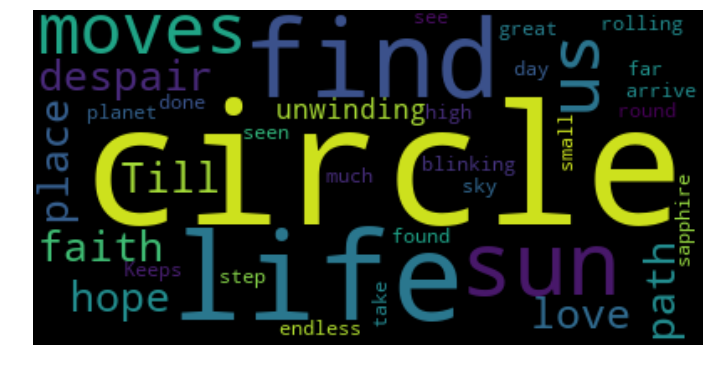

In [212]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 형태소 분석
- 문장 -> 컴퓨터를 사용합니다.
  - 어절 -> 컴퓨터를, 사용합니다.
    - 형태소 -> 컴퓨터(명사)/ 사용(동사) / 하다(동사)/ ㅂ니다(종결어미) ... 뜻을 가지는 최소단위
      - 음절 ->  하나하나 _의미 상관없이
      
      
형태소 분석의 한계점! 신조어, 은어, 오탈자, 띄어쓰기의 전처리 필요!!

### KoNLPy
Twitter, Komoran, Hannanum, Twitter, Mecab, Kkma

- 성능 비교 - 띄어쓰기 결과

  - Kkma, Mecab, Twitter 등이 그나마 괜춘하다...

- 성능비교 - 의미 파악

  - Kkma가 제일 의미를 잘 파악하고 있다~

- 성능 비교 - 신조어
  - Twitter가 신조어에서는 강한 방면이 있다~
  
- 성능 비교 - 시간
  - Kkma가 속도는 좀 많이 느리다... but! 성능은 good

#### 결국 형태소 분석이란?
- 형태소 : 의미를 갖는 최소 단위

In [214]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [65.5 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/mar

In [215]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
34 packages can be upgraded. Run 'apt

In [0]:
!apt upgrade

In [218]:
!apt-get install g++ openjdk-8-jdk

Setting up fonts-dejavu-extra (2.37-1) ...
Processing triggers for hicolor-icon-theme (0.17-2) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Setting up libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Setting up libgail18:amd64 (2.24.32-1ubuntu1) ...
Setting up x11-utils (7.7+3build1) ...
Setting up libgail-common:amd64 (2.24.32-1ubuntu1) ...
Setting up libatk-wrapper-java (0.33.3-20ubuntu0.1) ...
Setting up libgtk2.0-bin (2.24.32-1ubuntu1) ...
Setting up libatk-wrapper-java-jni:amd64 (0.33.3-20ubuntu0.1) ...
Setting up openjdk-8-jre:amd64 (8u212-b03-0ubuntu1.18.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/policytool to provide /usr/bin/policytool (policytool) in auto mode
Setting up openjdk-8-jdk:amd64 (8u212-b03-0ubuntu1.18.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/appletviewer to provide /usr/bin/appletviewer (appletviewer) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jconsole 

In [219]:
!pip install konlpy

In [220]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
## 문장
pprint(kkma.sentences(u"네 안녕하세요. 반갑습니다."))

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['네 안녕하세요.', '반갑습니다.']


In [222]:
##품사
pprint(kkma.pos(u"하늘을 나는 자동차"))
##꼬꼬마의 경우 날다를 동사로 받아온다!! 다른것들은 나(I)로 명사로...
## N들어가면 명사 V들어가면 동사 정도만...

[('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]


In [225]:
from konlpy.tag import Hannanum

han = Hannanum()

pprint(han.analyze(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
##디테일하게 들어가서 이렇게 해석도 되고, 저렇게 해석도 되고 그렇다~~

[[[('아버지', 'ncn'), ('가', 'jcc')], [('아버지', 'ncn'), ('가', 'jcs')]],
 [[('방', 'nbu'), ('에', 'jca')], [('방', 'ncn'), ('에', 'jca')]],
 [[('들', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')],
  [('듣', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')],
  [('들어가', 'pvg'), ('시', 'ep'), ('ㄴ다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('안녕', 'ncps'), ('하세', 'ncpa'), ('요', 'ncn')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세요', 'ef')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세', 'ef'), ('요', 'jxf')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('하늘', 'ncn'), ('을', 'jco')]],
 [[('나', 'ncn'), ('는', 'jxc')],
  [('나', 'npp'), ('는', 'jxc')],
  [('나', 'pvg'), ('는', 'etm')],
  [('나', 'px'), ('는', 'etm')],
  [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')],
  [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')],
  [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')],
  [('나', 'px'), ('아', 'ef'), ('는', 'etm')],
  [('날', 'pvg'), ('는', 'etm')]],
 [[('자동차', 'ncn')], [('자동', 'ncn'), ('차', 'ncn')]]]


In [226]:
pprint(han.morphs(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

['아버지',
 '가',
 '방',
 '에',
 '들',
 '어',
 '가',
 '시ㄴ다',
 '.',
 '안녕',
 '하',
 '세',
 '요',
 '.',
 '하늘',
 '을',
 '나',
 '는',
 '자동차']


In [227]:
pprint(han.nouns(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

['아버지', '방', '안녕', '하늘', '나', '자동차']


In [228]:
pprint(han.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
##여기서 나 가 명사로 인식...

[('아버지', 'N'),
 ('가', 'J'),
 ('방', 'N'),
 ('에', 'J'),
 ('들', 'P'),
 ('어', 'E'),
 ('가', 'P'),
 ('시ㄴ다', 'E'),
 ('.', 'S'),
 ('안녕', 'N'),
 ('하', 'X'),
 ('세', 'E'),
 ('요', 'J'),
 ('.', 'S'),
 ('하늘', 'N'),
 ('을', 'J'),
 ('나', 'N'),
 ('는', 'J'),
 ('자동차', 'N')]


In [229]:
from konlpy.tag import Komoran

ko = Komoran()

pprint(ko.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
##여기서 나 가 명사로 인식...

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EF'),
 ('.', 'SF'),
 ('안녕하세요', 'NNP'),
 ('.', 'SF'),
 ('하늘', 'NNG'),
 ('을', 'JKO'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('자동차', 'NNG')]


In [231]:
pprint(ko.morphs(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

['아버지',
 '가',
 '방',
 '에',
 '들어가',
 '시',
 'ㄴ다',
 '.',
 '안녕하세요',
 '.',
 '하늘',
 '을',
 '나',
 '는',
 '자동차']


In [232]:
pprint(ko.nouns(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
## 안녕하세요는 계속 그냥 그대로...

['아버지', '방', '안녕하세요', '하늘', '자동차']


In [234]:
from konlpy.tag import Twitter

tw = Twitter()

pprint(tw.phrases(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['아버지', '하늘', '자동차']


In [235]:
pprint(tw.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
##트위터가 품사를 알려주는 데 있어 조금 더 명확하게 했다.

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation'),
 ('안녕하세요', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('을', 'Josa'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('자동차', 'Noun')]


## 한국어 영화 리뷰 분석

200개 영화 리뷰 100개씩을 가져온 데이터

1~10점까지의 평점

중립(5-8)은 제외, (1-4)는 긍정, (9-10)은 부정